In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [20]:
dfC1 = pd.read_csv("dataForC1.csv")
dfC2 = pd.read_csv("dataForC2.csv")
dfC3 = pd.read_csv("dataForC3.csv")
dfC3_100k = pd.read_csv("dataForC3_100k.csv")
dfC3_1mil = pd.read_csv("dataForC3_1mil.csv")
dfC3_10mil = pd.read_csv("dataForC3_10mil.csv")
dfD = pd.read_csv("dataForD.csv")

In [72]:
# df_time.head()
dfD.head()

,algo,noOfComparisons,cpuTimeInMs
0,mergesort,215734874,4649.0
1,hybridsort,230689979,3580.0


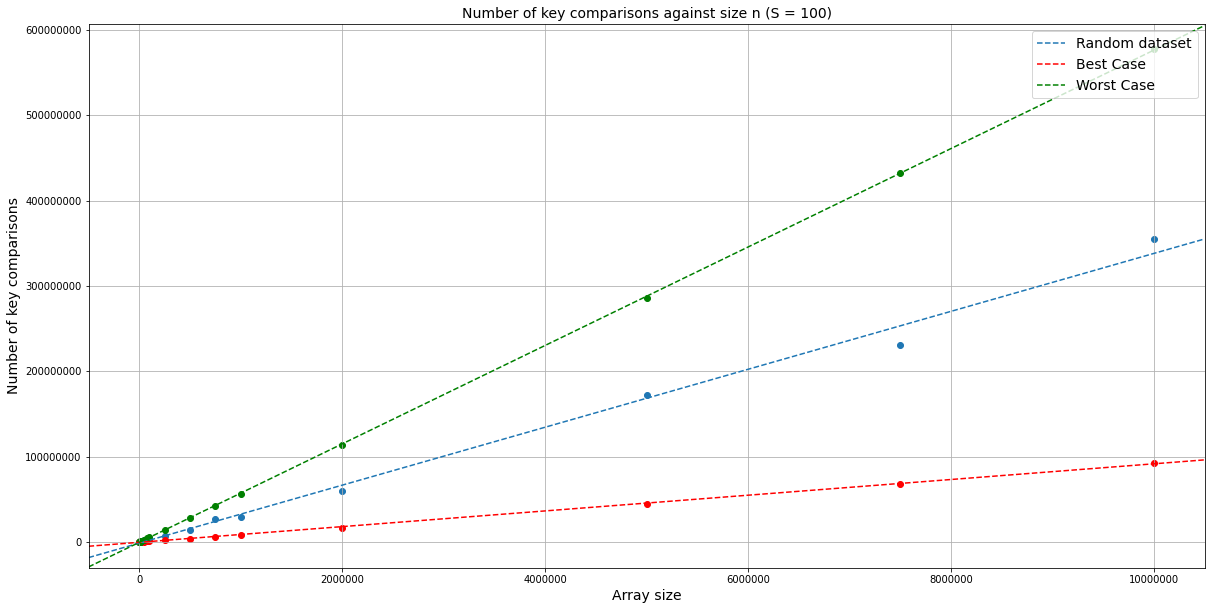

In [22]:
plt.figure(figsize=(20,10))
x = dfC1["arrayLength"]
y = dfC1["noOfComparisons"]
plt.scatter(x, y)


m, b = np.polyfit(x, y, deg=1)
plt.axline(xy1=(0, b), slope=m, label="Random dataset", linestyle="--")

#best
bestX = dfC1["arrayLength"]
k = 100
bestY = (bestX/2) * np.log2(bestX/k) + bestX/k * (k-1)
plt.scatter(bestX, bestY, color="r")

mBest, bBest = np.polyfit(bestX, bestY, deg=1)
plt.axline(xy1=(0, bBest), slope=mBest, label="Best Case", linestyle="--", color="r")

#worst
worstX = dfC1["arrayLength"]
k = 100
worstY = (worstX * k - worstX) /2 - worstX/k + 1 + np.log2(worstX/k) * (worstX/2)
plt.scatter(worstX, worstY, color="g")

mWorst, bWorst = np.polyfit(worstX, worstY, deg=1)
plt.axline(xy1=(0, bWorst), slope=mWorst, label="Worst Case", linestyle="--", color="g")

plt.title('Number of key comparisons against size n (S = 100)', fontsize=14)
plt.xlabel('Array size', fontsize=14)
plt.ylabel('Number of key comparisons', fontsize=14)
plt.legend(loc='upper right', prop={'size': 14})
plt.grid()

plt.ticklabel_format(style='plain', axis='both', scilimits=(0,0))

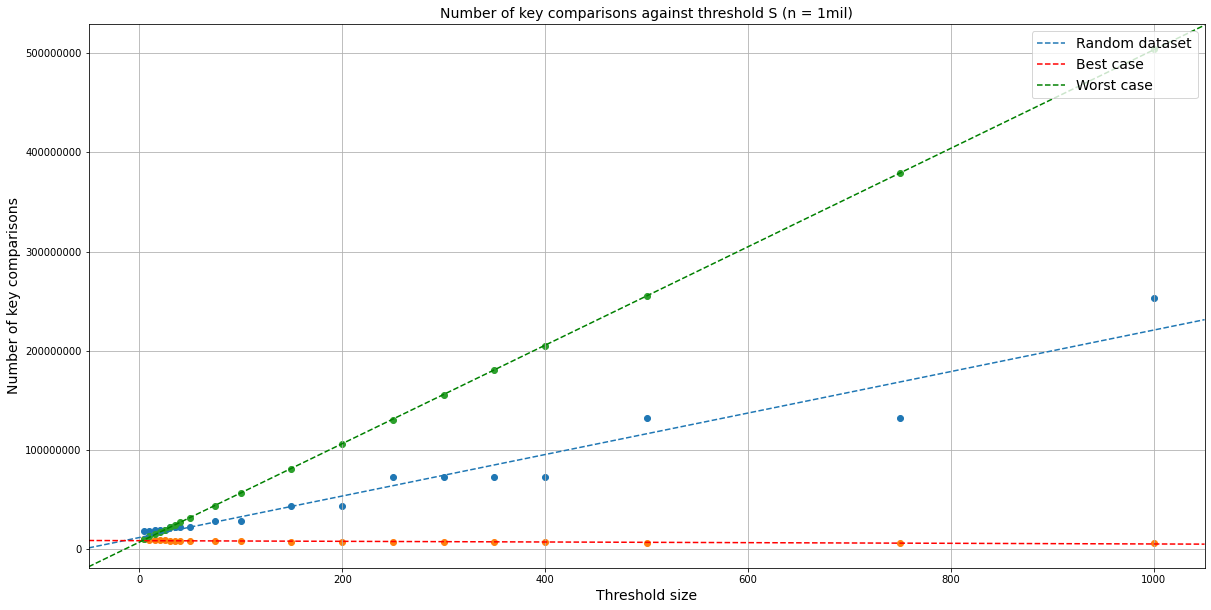

In [23]:
plt.figure(figsize=(20,10))
x = dfC2["threshold"]
y = dfC2["noOfComparisons"]
plt.scatter(x, y)


m, b = np.polyfit(x, y, deg=1)
plt.axline(xy1=(0, b), slope=m, label="Random dataset", linestyle="--")

#best
bestX = dfC2["threshold"]
n = 1000000
bestY = (n/2) * np.log2(n/bestX) + n/bestX * (bestX-1)
plt.scatter(bestX, bestY)

mBest, bBest = np.polyfit(bestX, bestY, deg=1)
plt.axline(xy1=(0, bBest), slope=mBest, label="Best case", linestyle="--", color="r")

#worst
worstX = dfC2["threshold"]
n = 1000000
worstY = n *worstX+ n *np.log2(n/worstX)
worstY = (n * worstX - n) /2 - n/worstX + 1 + np.log2(n/worstX) * (n/2)
plt.scatter(worstX, worstY)

mWorst, bWorst = np.polyfit(worstX, worstY, deg=1)
plt.axline(xy1=(0, bWorst), slope=mWorst, label="Worst case", linestyle="--", color="g")

plt.title('Number of key comparisons against threshold S (n = 1mil)', fontsize=14)
plt.xlabel('Threshold size', fontsize=14)
plt.ylabel('Number of key comparisons', fontsize=14)
plt.legend(loc='upper right', prop={'size': 14})
plt.grid()

plt.ticklabel_format(style='plain', axis='both', scilimits=(0,0))

# plt.xlim(0, 1300)
# plt.ylim(100000, 12000000)

In [7]:
def plotC3(df, title):
    plt.figure(figsize=(20,10))
    x = df["threshold"]
    y = df["timeTakenInMs"]
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)
    plt.plot(x ,p(x),"--" , label="trend line")
    plt.scatter(x, y)
    
    plt.title(title, fontsize=14)
    plt.xlabel('Threshold size', fontsize=14)
    plt.ylabel('Time Taken in ms', fontsize=14)
    plt.legend(loc='upper right', prop={'size': 14})
    plt.grid()

# x100k = dfC3_100k["threshold"]
# y100k = dfC3_100k["timeTakenInMs"]
# z100k = np.polyfit(x100k, y100k, 2)
# p = np.poly1d(z100k)
# plt.plot(x100k ,p(x100k),"--" , label="test")
# plt.scatter(x100k, y100k)

# # 1mil
# x1mil = dfC3_1mil["threshold"]
# y1mil = dfC3_1mil["timeTakenInMs"]
# z1mil = np.polyfit(x1mil, y1mil, 2)
# p = np.poly1d(z1mil)
# plt.plot(x1mil ,p(x1mil),"--" , label="test")
# plt.scatter(x1mil, y1mil)

#10mil
# x10mil = dfC3_10mil["threshold"]
# y10mil = dfC3_10mil["timeTakenInMs"]
# z10mil = np.polyfit(x10mil, y10mil, 2)
# p = np.poly1d(z10mil)
# plt.plot(x10mil ,p(x10mil),"--" , label="test")
# plt.scatter(x10mil, y10mil)



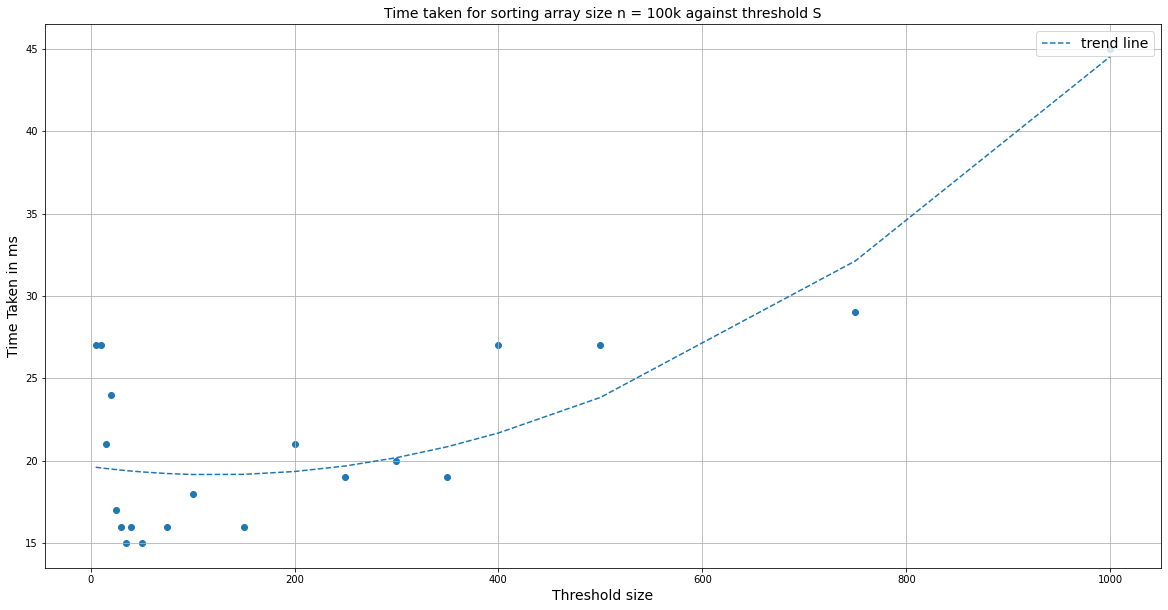

In [8]:
plotC3(dfC3, "Time taken for sorting array size n = 100k against threshold S")

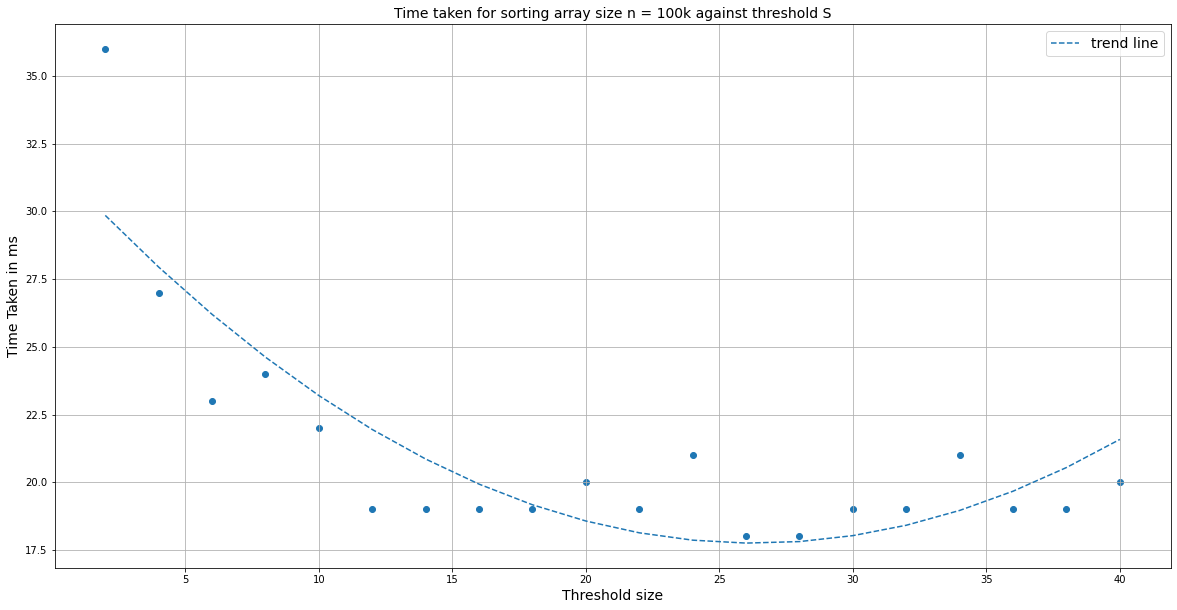

In [9]:
plotC3(dfC3_100k, "Time taken for sorting array size n = 100k against threshold S")

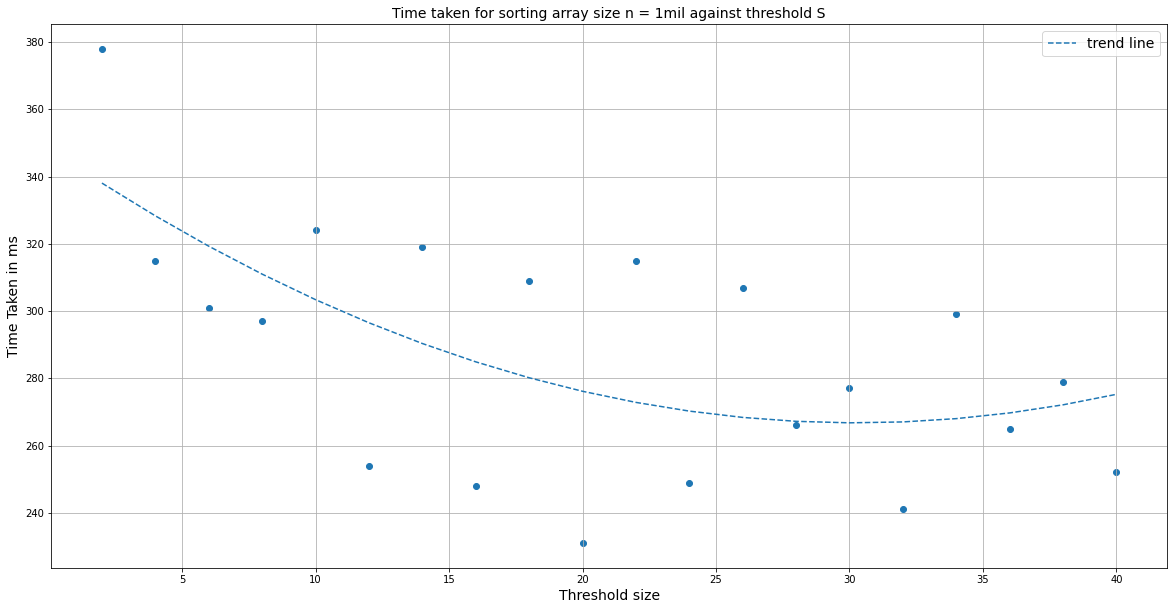

In [10]:
plotC3(dfC3_1mil, "Time taken for sorting array size n = 1mil against threshold S")

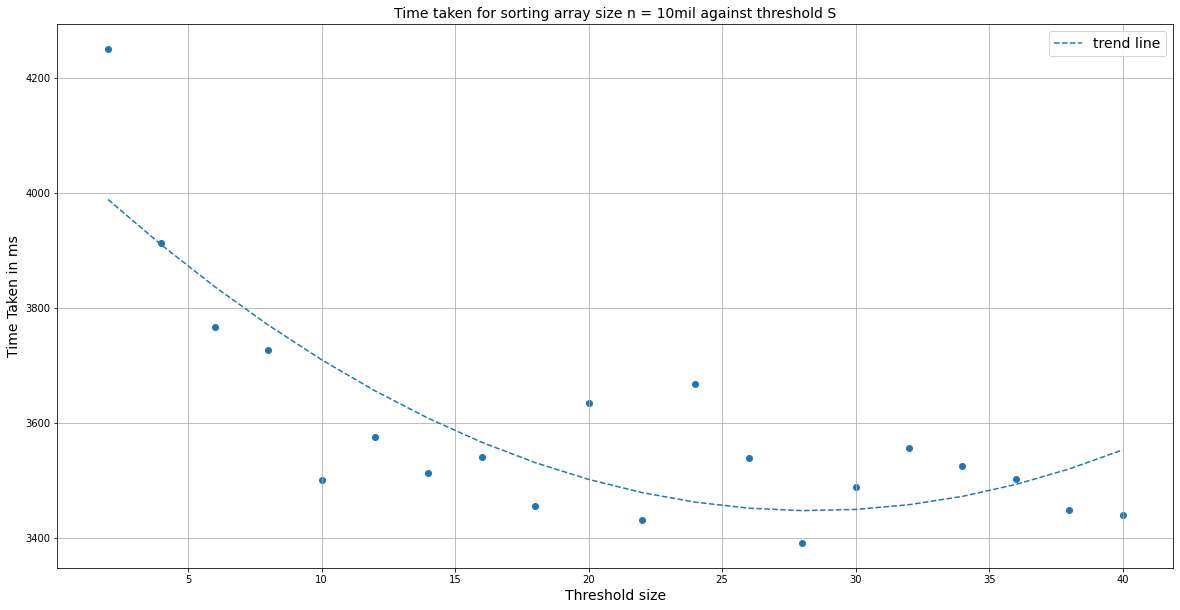

In [12]:
plotC3(dfC3_10mil, "Time taken for sorting array size n = 10mil against threshold S")

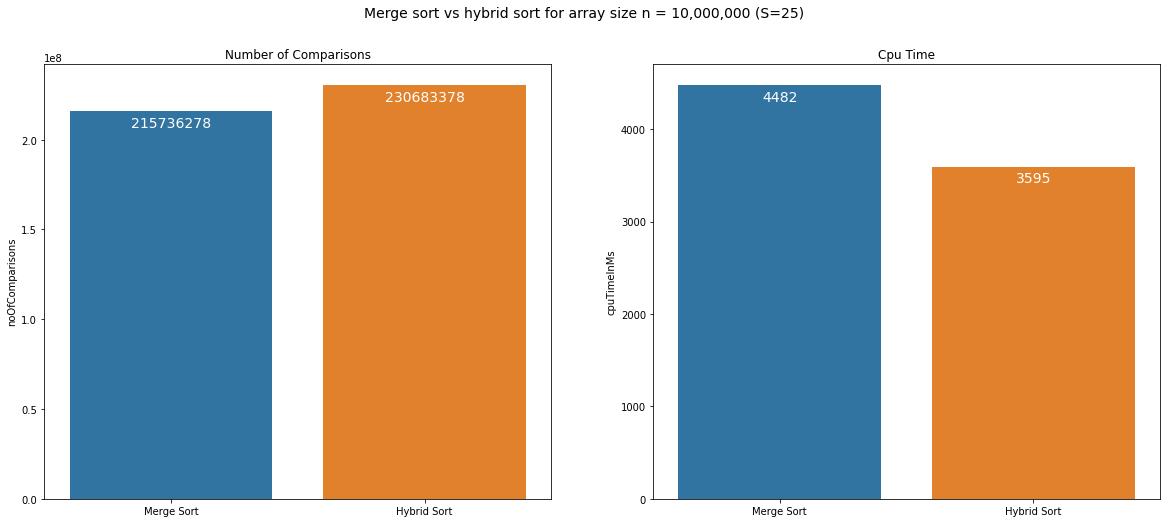

In [18]:
fig, axes = plt.subplots(1,2, figsize=(20,8))

keyComparisons = dfD.iloc[:, 1]
cpuTime = dfD.iloc[:, 2]

algo = ["Merge Sort", "Hybrid Sort"]
sub_plot1 = sns.barplot(x=algo, y=keyComparisons, ax=axes[0], label="Some Label")
sub_plot2 = sns.barplot(x=algo, y=cpuTime, ax=axes[1])

for p in sub_plot1.patches:
        sub_plot1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -12), 
                textcoords = 'offset points', color="w", fontsize=14),

for p in sub_plot2.patches:
        sub_plot2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -12), 
                textcoords = 'offset points', color="w", fontsize=14),
        

axes[0].set_title("Number of Comparisons", fontsize=12)
axes[1].set_title("Cpu Time", fontsize=12)

fig.suptitle('Merge sort vs hybrid sort for array size n = 10,000,000 (S=25)', fontsize=14)
        
plt.show()